In [ ]:
from zipfile import ZipFile
import os

# Specify the path to the zip file and the extraction directory
zip_file_path = '/content/archive.zip'
extraction_dir = '/content/datos'

# Create the extraction directory if it does not exist
os.makedirs(extraction_dir, exist_ok=True)

# Open the zip file and extract its contents
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

In [ ]:
# Habilitar GPU en Colab
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 904845166385227560
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14410383360
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9737917729749639373
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Ruta a las carpetas "train" y "test"
train_path = "/content/datos/DATASET/TRAIN"
test_path = "/content/datos/DATASET/TEST"

# Función para cargar y procesar las imágenes por lotes
def cargar_imagenes_por_lotes(path, batch_size):
    imagenes = []
    etiquetas = []
    for etiqueta in os.listdir(path):
        etiqueta_path = os.path.join(path, etiqueta)
        for archivo in os.listdir(etiqueta_path):
            archivo_path = os.path.join(etiqueta_path, archivo)
            imagen = cv2.imread(archivo_path)
            imagen = cv2.resize(imagen, (100, 100))
            imagenes.append(imagen.flatten())
            etiquetas.append(etiqueta)
            if len(imagenes) == batch_size:
                yield np.array(imagenes), np.array(etiquetas)
                imagenes = []
                etiquetas = []

# Cargar imágenes de las carpetas "train" y "test" por lotes
batch_size = 32  # Puedes ajustar según tus necesidades
for X_batch, y_batch in cargar_imagenes_por_lotes(train_path, batch_size):
    # Procesar cada lote aquí
    pass

for X_batch, y_batch in cargar_imagenes_por_lotes(test_path, batch_size):
    # Procesar cada lote aquí
    pass

# Función para cargar y procesar todas las imágenes
def cargar_imagenes(path):
    imagenes = []
    etiquetas = []
    for etiqueta in os.listdir(path):
        etiqueta_path = os.path.join(path, etiqueta)
        for archivo in os.listdir(etiqueta_path):
            archivo_path = os.path.join(etiqueta_path, archivo)
            imagen = cv2.imread(archivo_path)
            imagen = cv2.resize(imagen, (100, 100))
            imagenes.append(imagen.flatten())
            etiquetas.append(etiqueta)
    return np.array(imagenes), np.array(etiquetas)

# Cargar imágenes de las carpetas "train" y "test"
X_train, y_train = cargar_imagenes(train_path)
X_test, y_test = cargar_imagenes(test_path)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reducción de dimensionalidad con PCA (opcional)
pca = PCA(n_components=10)  # Puedes ajustar el número de componentes según tus necesidades
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Número de clústeres (se puede ajustar este valor)
num_clusters = 2

# Aplicar K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# Utiliza X_train_pca en lugar de X_test_pca
kmeans.fit(X_train_pca)

# Asignar etiquetas de clúster a las imágenes de entrenamiento y prueba
train_labels = kmeans.predict(X_train_pca)
test_labels = kmeans.predict(X_test_pca)

# Visualizar resultados (puedes ajustar según tus necesidades)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('K-Means Clustering - Train Data')
plt.show()

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=test_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('K-Means Clustering - Test Data')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


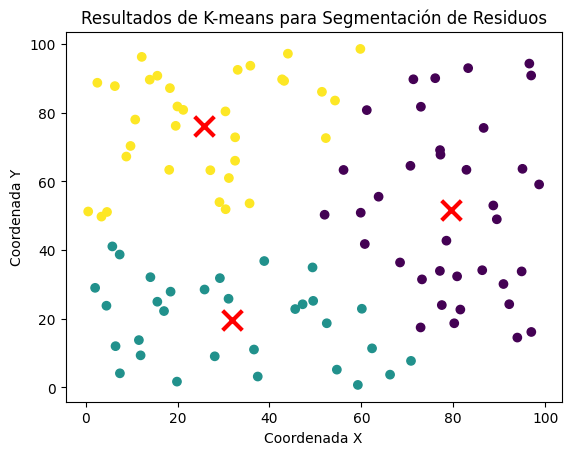

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Paso 1: Recolectar y preprocesar datos (sustituimos 'data' con datos reales)
# Se generan datos aleatorios para propósitos de demostración
np.random.seed(42)  # Para reproducibilidad
num_samples = 100
x_coordinates = np.random.uniform(0, 100, num_samples)
y_coordinates = np.random.uniform(0, 100, num_samples)
feature1_values = np.random.uniform(0, 1, num_samples)
feature2_values = np.random.uniform(0, 1, num_samples)

# Crear el array 'data' con los valores generados
data = np.array(list(zip(x_coordinates, y_coordinates, feature1_values, feature2_values)))

# Paso 2: Seleccionar número óptimo de clusters (k)
# Puedes utilizar métodos como el codo (elbow method) para determinar k
k = 3

# Paso 3: Crear e entrenar el modelo K-means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

# Paso 4: Obtener las etiquetas de cluster y los centros de cluster
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Visualización de resultados (puedes adaptar esto según tus necesidades)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, linewidths=3, color='red')
plt.title('Resultados de K-means para Segmentación de Residuos')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()
